In [126]:
import torchvision
mnist_train=torchvision.datasets.MNIST('mnist',train=True,download=True,transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,), (0.3081,))]))
mnist_test=torchvision.datasets.MNIST('mnist',train=False,download=True,transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.1307,), (0.3081,))]))

In [98]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import helper


In [99]:


if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

In [100]:
print(torch.cuda.is_available())

True


In [ ]:
class Neural_Network1(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    super(Neural_Network1,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)
    self.l1=nn.Linear(hidden_units,hidden_units)
    self.l2=nn.Linear(hidden_units,hidden_units)
    self.l3=nn.Linear(hidden_units,hidden_units)
    self.l4=nn.Linear(hidden_units,hidden_units)
    self.l5=nn.Linear(hidden_units,hidden_units)
    self.ou=nn.Linear(hidden_units,out)
    self.relu=nn.ReLU()
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.relu(self.inp(self.x))
    self.x1=self.relu(self.l1(self.xi))
    self.x2=self.relu(self.l2(self.x1))
    self.x3=self.relu(self.l3(self.x2))
    self.x4=self.relu(self.l4(self.x3))
    self.x5=self.relu(self.l5(self.x4))
    self.x6=self.ou(self.x5)
    self.softmax=F.log_softmax(self.x6,dim=1) 
    return self.softmax

In [ ]:
train=torch.utils.data.DataLoader(mnist_train,batch_size=150) #batch size 150
test=torch.utils.data.DataLoader(mnist_test,batch_size=150)

In [ ]:
model1=Neural_Network1(input_units=28*28,hidden_units=1024,out=10).cuda()

In [ ]:
# Training the Feedforward Neural Network

loss=nn.CrossEntropyLoss()
param=model1.parameters()
optimize=torch.optim.Adagrad(param,lr=0.002)
no_of_epochs=35

for i in range(no_of_epochs):
  for num,dat in enumerate(train):

    im,la=dat
    ff_out=model1.Forward_prop(im.cuda())
    optimize.zero_grad()
    losses=loss(ff_out,la.cuda())
    losses.backward()
    optimize.step()
  
  print("epoch {} is done".format(i))






epoch 0 is done
epoch 1 is done
epoch 2 is done
epoch 3 is done
epoch 4 is done
epoch 5 is done
epoch 6 is done
epoch 7 is done
epoch 8 is done
epoch 9 is done
epoch 10 is done
epoch 11 is done
epoch 12 is done
epoch 13 is done
epoch 14 is done
epoch 15 is done
epoch 16 is done
epoch 17 is done
epoch 18 is done
epoch 19 is done
epoch 20 is done
epoch 21 is done
epoch 22 is done
epoch 23 is done
epoch 24 is done
epoch 25 is done
epoch 26 is done
epoch 27 is done
epoch 28 is done
epoch 29 is done
epoch 30 is done
epoch 31 is done
epoch 32 is done
epoch 33 is done
epoch 34 is done


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_save_name = 'mnist_pytorch.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(model1.state_dict(), path)

In [ ]:
model_save_name = 'mnist_pytorch.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
model1.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
# Testing the Feedforward Neural Network
length=0
correct_count=0
with torch.no_grad():
  for dat in test:
    im,la=dat
    test_out=model1.Forward_prop(im.cuda())
    _,pred=torch.max(test_out.data,1)
    length+=la.size(0)
    correct_count+=(pred.cpu()==la).sum().item()



In [ ]:
print(" the Testing accuracy is {}".format(correct_count/length *100))

 the Testing accuracy is 98.22999999999999


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
import random
random_dim=random.choices(range(1,1025),k=10) #10 random dimensions

In [ ]:
ra=[i for i in range(1000)]
subs=torch.utils.data.Subset(mnist_test,ra)
sub_set=torch.utils.data.DataLoader(subs,batch_size=1000)

In [ ]:
len(subs)

1000

In [ ]:
# Finding outputs for the softmax layer
labels_sub=[]
with torch.no_grad():
  for dat in sub_set:
    im,la=dat
    test_out=model1.Forward_prop(im.cuda())
    labels_sub.append(la)
    labels=la.cuda()
    x_5=model1.x5
    #fifth_layer.append(fif_out)

In [ ]:
x_5=x_5[:,random_dim] #taking subsample

In [ ]:
test_out.size()

torch.Size([1000, 10])

In [ ]:
#fifth layer
image_predicted={}
fifth_pred={}
for i in range(1000):
  image_predicted[i]=int(np.argmax(test_out[i].cpu()))
  fifth_pred[i]=int(np.argmax(x_5[i].cpu()))



In [ ]:
list_of_imgs=[]
list_of_dims=[i for i in range(10)]
for i in list_of_dims:
  l=[]
  for img,dim in image_predicted.items():
    if(dim==i):
      l.append(img)
  list_of_imgs.append(l[:10])






In [ ]:
list_of_imgs

[[3, 10, 13, 25, 28, 55, 69, 71, 101, 126],
 [2, 5, 14, 29, 31, 37, 39, 40, 46, 57],
 [1, 35, 38, 43, 47, 72, 77, 82, 106, 119],
 [18, 30, 32, 44, 51, 63, 68, 76, 87, 90],
 [4, 6, 19, 24, 27, 33, 42, 48, 49, 56],
 [8, 15, 23, 45, 52, 53, 59, 102, 120, 127],
 [11, 21, 22, 50, 54, 66, 81, 88, 91, 98],
 [0, 17, 26, 34, 36, 41, 60, 64, 70, 75],
 [61, 84, 110, 128, 134, 146, 177, 179, 181, 184],
 [7, 9, 12, 16, 20, 58, 62, 73, 78, 92]]

In [ ]:
samp_image={}
i=0
for dat,la in subs:
  samp_image[i]=dat
  i+=1


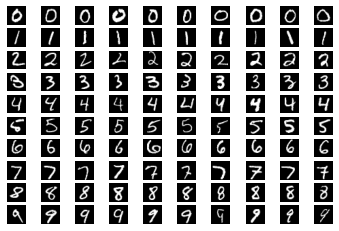

In [ ]:
#image, label = next(iter(test))
f,a=plt.subplots(10,10)
for i in range(10):
 for j in range(10):
    a[i][j].imshow(samp_image[list_of_imgs[i][j]].reshape(28,28),cmap='gray')
    a[i][j].axis('off')

    




#plt.imshow(images[101].reshape(28,28),cmap='gray')

In [ ]:

dic_imgs={}
list_of_dims=[i for i in range(10)]
for i in list_of_dims:
  l=[]
  c=0
  for img,dim in fifth_pred.items():
    if(dim==i and c!=10):
      c+=1
      if i not in dic_imgs:
        dic_imgs[i]=[img]
      else:
        dic_imgs[i].append(img)
  #list_of_imgs.append(l[:10])
dic_imgs

{0: [1, 8, 15, 18, 23, 30, 32, 36, 38, 43],
 1: [93, 450, 957],
 2: [65, 104, 115, 209, 432, 616],
 3: [119, 823],
 4: [4, 6, 7, 9, 12, 16, 19, 20, 24, 27],
 5: [84, 110, 177, 266, 355, 621, 693, 718, 761],
 6: [2, 5, 11, 14, 21, 22, 31, 37, 39, 40],
 7: [29, 189, 251, 900],
 8: [3, 10, 13, 25, 28, 35, 47, 55, 69, 71],
 9: [0, 17, 26, 34, 41, 60, 64, 70, 75, 80]}

In [ ]:
samp_image={}
i=0
for dat,la in subs:
  samp_image[i]=dat
  i+=1


In [ ]:
lengthiest = max(len(i) for i in dic_imgs.values())
dic_imgs = {key: value+ [np.nan]*(lengthiest-len(value)) for key,value in dic_imgs.items()}
dic_imgs

{0: [1, 8, 15, 18, 23, 30, 32, 36, 38, 43],
 1: [93, 450, 957, nan, nan, nan, nan, nan, nan, nan],
 2: [65, 104, 115, 209, 432, 616, nan, nan, nan, nan],
 3: [119, 823, nan, nan, nan, nan, nan, nan, nan, nan],
 4: [4, 6, 7, 9, 12, 16, 19, 20, 24, 27],
 5: [84, 110, 177, 266, 355, 621, 693, 718, 761, nan],
 6: [2, 5, 11, 14, 21, 22, 31, 37, 39, 40],
 7: [29, 189, 251, 900, nan, nan, nan, nan, nan, nan],
 8: [3, 10, 13, 25, 28, 35, 47, 55, 69, 71],
 9: [0, 17, 26, 34, 41, 60, 64, 70, 75, 80]}

In [ ]:
for i in list_of_dims:
  if i not in dic_imgs:
    dic_imgs[i]=[np.nan]*10

In [ ]:
dic_imgs

{0: [1, 8, 15, 18, 23, 30, 32, 36, 38, 43],
 1: [93, 450, 957, nan, nan, nan, nan, nan, nan, nan],
 2: [65, 104, 115, 209, 432, 616, nan, nan, nan, nan],
 3: [119, 823, nan, nan, nan, nan, nan, nan, nan, nan],
 4: [4, 6, 7, 9, 12, 16, 19, 20, 24, 27],
 5: [84, 110, 177, 266, 355, 621, 693, 718, 761, nan],
 6: [2, 5, 11, 14, 21, 22, 31, 37, 39, 40],
 7: [29, 189, 251, 900, nan, nan, nan, nan, nan, nan],
 8: [3, 10, 13, 25, 28, 35, 47, 55, 69, 71],
 9: [0, 17, 26, 34, 41, 60, 64, 70, 75, 80]}

In [ ]:
ll=[]
for i,j in dic_imgs.items():
  ll.append(j)

In [ ]:
ll

[[1, 8, 15, 18, 23, 30, 32, 36, 38, 43],
 [93, 450, 957, nan, nan, nan, nan, nan, nan, nan],
 [65, 104, 115, 209, 432, 616, nan, nan, nan, nan],
 [119, 823, nan, nan, nan, nan, nan, nan, nan, nan],
 [4, 6, 7, 9, 12, 16, 19, 20, 24, 27],
 [84, 110, 177, 266, 355, 621, 693, 718, 761, nan],
 [2, 5, 11, 14, 21, 22, 31, 37, 39, 40],
 [29, 189, 251, 900, nan, nan, nan, nan, nan, nan],
 [3, 10, 13, 25, 28, 35, 47, 55, 69, 71],
 [0, 17, 26, 34, 41, 60, 64, 70, 75, 80]]

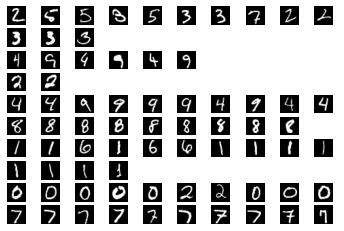

In [ ]:
#image, label = next(iter(test))
f,a=plt.subplots(10,10)
for i in range(10):
  for j in range(10):
      a[i][j].axis('off')
      if(np.isnan(ll[i][j])):
        continue
      a[i][j].imshow(samp_image[ll[i][j]].reshape(28,28),cmap='gray')
      #a[i][j].axis('off')

*As we see from the above plot some rows are missing, also in some cases some columns are missing(blank spaces).The nodes of the hidden layer become 'specialists' of some features for example identifying edges of the images. I believe the reason for blank spaces is that some nodes try to identify complex/unknown features which may not be present in any of the images in the dataset. As we go deeper into the neural network architecture more relevant/discriminating(features for distinguishing between images) are learnt. Ideal scenario would be to have entire row with same digits/nodes have become 'specialists' in identifying the most discriminant features to distinguish between digits in the data. *

In [ ]:
#### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

In [ ]:
#labels
tar=labels.cpu().numpy()

In [ ]:
def plot_pca(data):
  pca=PCA(2)
  pca_out=pca.fit_transform(data.cpu())
  digit=[i for i in range(10)]
  colors_plot=['blue','green','red','cyan','magenta','yellow','gray','orange','navy','brown']
  df_pca=pd.DataFrame(data=pca_out,columns=['axis1','axis2'])
  df_pca['Target']=tar
  mean_df=df_pca.groupby('Target').mean() #grouping by the mean of digits


  for di,co in zip(digit,colors_plot):
    ind=df_pca['Target']==di
    plt.scatter(df_pca.loc[ind,'axis1'],df_pca.loc[ind,'axis2'],c=co)
    plt.text(mean_df.loc[di,'axis1'],mean_df.loc[di,'axis2'],di,fontsize=18)
  plt.title('PCA Plot')
  plt.legend(digit)
  




In [ ]:
def plot_tsne(data):
  tsne=TSNE(2)
  tsne_out=tsne.fit_transform(data.cpu())
  digit=[i for i in range(10)]
  colors_plot=['blue','green','red','cyan','magenta','yellow','gray','orange','navy','brown']
  df_tsne=pd.DataFrame(data=tsne_out,columns=['axis1','axis2'])
  df_tsne['Target']=tar
  mean_df=df_tsne.groupby('Target').mean()
  #print(mean_df)

  for di,co in zip(digit,colors_plot):
    ind=df_tsne['Target']==di
    plt.scatter(df_tsne.loc[ind,'axis1'],df_tsne.loc[ind,'axis2'],c=co)
    plt.text(mean_df.loc[di,'axis1'],mean_df.loc[di,'axis2'],di,fontsize=18)
  plt.title('TSNE Plot')
  plt.legend(digit)
  




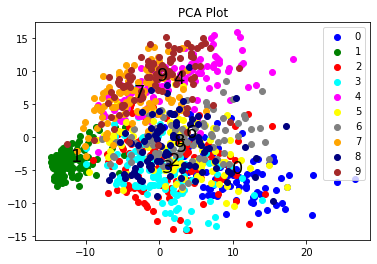

In [ ]:
plot_pca(model1.x)

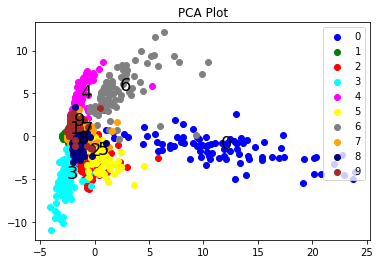

In [ ]:
plot_pca(model1.x1)

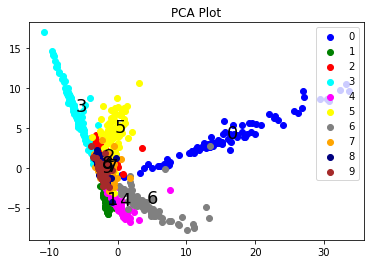

In [ ]:
plot_pca(model1.x2)

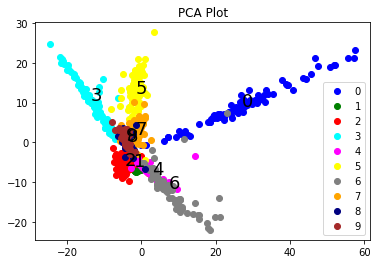

In [ ]:
plot_pca(model1.x3)

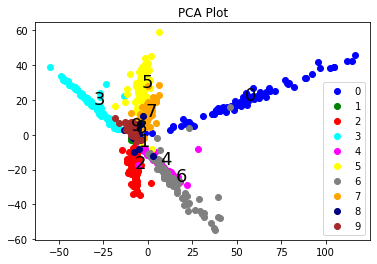

In [ ]:
plot_pca(model1.x4)

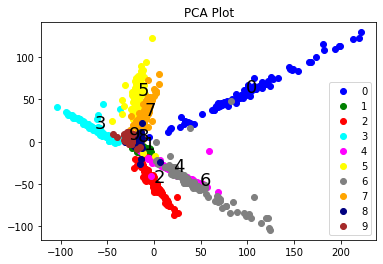

In [ ]:
plot_pca(model1.x5)

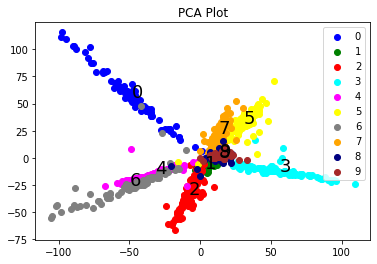

In [ ]:
plot_pca(model1.x6)

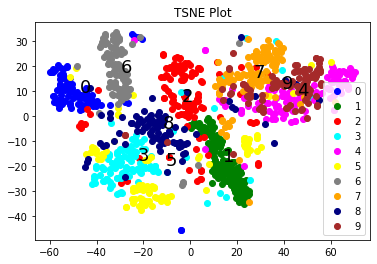

In [ ]:
plot_tsne(model1.x)

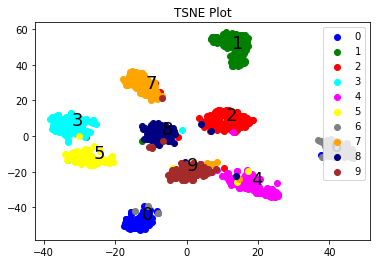

In [ ]:
plot_tsne(model1.x1)

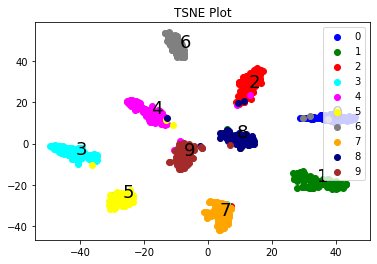

In [ ]:
plot_tsne(model1.x2)

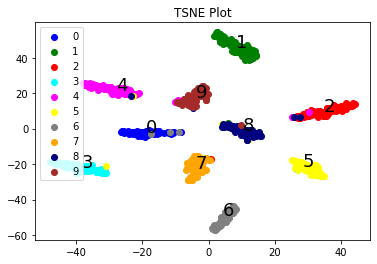

In [ ]:
plot_tsne(model1.x3)

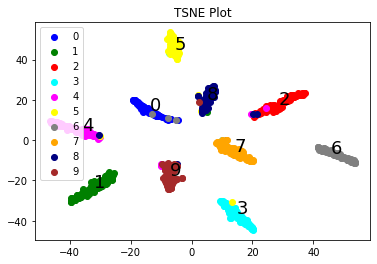

In [ ]:
plot_tsne(model1.x4)

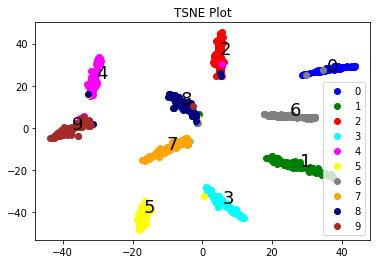

In [ ]:
plot_tsne(model1.x5)

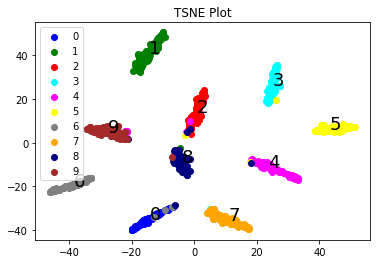

In [ ]:
plot_tsne(model1.x6)

*We observe from the plots that TSNE is able to distinguish between the digits better than PCA. This maybe due to the fact that we may not be taking all the dimensions that capture the maximum variance/information of the data in the case of PCA. This can be resolved by possibly performing a grid search to find the optimal number of PCA components which would improve the visualizations of our PCA model.We can also observe that the digits become more and more seperable/distinguishable as we go deeper in the neural network architecture.*

In [ ]:
##### Part 2

In [ ]:
import IPython.display as ipd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_x_01.wav to test_x_01.wav
Saving test_x_02.wav to test_x_02.wav
Saving train_clean_male.wav to train_clean_male.wav
Saving train_dirty_male.wav to train_dirty_male.wav


In [ ]:
!pip install librosa 
import librosa
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [ ]:
S.shape

(513, 2459)

In [ ]:
S_abs=np.abs(S)
X_abs=np.abs(X)

In [ ]:
S= torch.tensor(np.transpose(S_abs)).cuda()
X = torch.tensor(np.transpose(X_abs)).cuda()

In [ ]:
class Neural_Network_3(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    super(Neural_Network_3,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)

    nn.init.xavier_normal_(self.inp.weight)

    self.l1=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l1.weight)

    self.l2=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l2.weight)

    self.l3=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l3.weight)

    self.ou=nn.Linear(hidden_units,out)

    nn.init.xavier_normal_(self.ou.weight)

    self.relu=nn.ReLU()
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.relu(self.inp(self.x))
    self.x1=self.relu(self.l1(self.xi))
    self.x2=self.relu(self.l2(self.x1))
    self.x3=self.relu(self.l3(self.x2))
    self.x4=self.ou(self.x3)
    self.out=self.relu(self.x4) 
    return self.out

In [ ]:
model_3=Neural_Network_3(input_units=513,hidden_units=2459,out=513).cuda()

In [ ]:
loss=nn.MSELoss()
param=model_3.parameters()
optimize=torch.optim.Adam(param,lr=0.0001)
batch_num=500

In [ ]:
def train_model_3(no_of_epochs):
  for i in range(0,len(X),batch_num):
    X_batch=X[i:i+batch_num]
    S_batch=S[i:i+batch_num]
    ff_out=model_3.Forward_prop(X_batch.cuda())
    optimize.zero_grad()
    losses=loss(ff_out,S_batch.cuda())
    losses.backward()
    optimize.step()
  return losses.data
  
  
  #print("epoch {} is done".format(i))

In [ ]:
training_loss=[]
for i in range(300):
  tr_l=train_model_3(i)
  training_loss.append(tr_l)
  print("epoch {} is done".format(i))


epoch 0 is done
epoch 1 is done
epoch 2 is done
epoch 3 is done
epoch 4 is done
epoch 5 is done
epoch 6 is done
epoch 7 is done
epoch 8 is done
epoch 9 is done
epoch 10 is done
epoch 11 is done
epoch 12 is done
epoch 13 is done
epoch 14 is done
epoch 15 is done
epoch 16 is done
epoch 17 is done
epoch 18 is done
epoch 19 is done
epoch 20 is done
epoch 21 is done
epoch 22 is done
epoch 23 is done
epoch 24 is done
epoch 25 is done
epoch 26 is done
epoch 27 is done
epoch 28 is done
epoch 29 is done
epoch 30 is done
epoch 31 is done
epoch 32 is done
epoch 33 is done
epoch 34 is done
epoch 35 is done
epoch 36 is done
epoch 37 is done
epoch 38 is done
epoch 39 is done
epoch 40 is done
epoch 41 is done
epoch 42 is done
epoch 43 is done
epoch 44 is done
epoch 45 is done
epoch 46 is done
epoch 47 is done
epoch 48 is done
epoch 49 is done
epoch 50 is done
epoch 51 is done
epoch 52 is done
epoch 53 is done
epoch 54 is done
epoch 55 is done
epoch 56 is done
epoch 57 is done
epoch 58 is done
epoch 5

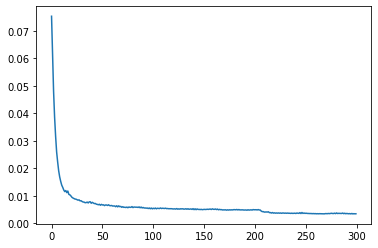

In [ ]:
plt.plot(list(range(300)),training_loss)

In [ ]:
s, sr=librosa.load('test_x_01.wav', sr=None)
X_t1=librosa.stft(s, n_fft=1024, hop_length=512)
xt1=librosa.stft(s, n_fft=1024, hop_length=512)
sa, sr=librosa.load('test_x_02.wav', sr=None)
X_t2=librosa.stft(sa, n_fft=1024, hop_length=512)
xt2=librosa.stft(sa, n_fft=1024, hop_length=512)

In [ ]:
def test_model_3(x):
  with torch.no_grad():
    out=model_3.Forward_prop(x)
  return out



In [ ]:
def reconstruct(x,o_inp):
  test_out=test_model_3(x)
  test_out=test_out.cpu().numpy()
  x_den=x.cpu().numpy()
  S_hat=(o_inp.T/x_den)*test_out
  return S_hat


In [ ]:
X_t1=np.abs(X_t1)
X_t1= torch.tensor(np.transpose(X_t1)).cuda()

In [ ]:
X_t2=np.abs(X_t2)
X_t2= torch.tensor(np.transpose(X_t2)).cuda()

In [ ]:
s1=reconstruct(X_t1,xt1)


In [ ]:
s.shape

(72619,)

In [ ]:
s2=reconstruct(X_t2,xt2)

In [ ]:
s1_re=librosa.istft(s1.T,hop_length=512,length =len(s))
s2_re=librosa.istft(s2.T,hop_length=512,length =len(sa))

In [ ]:
librosa.output.write_wav('test_s_01_recons.wav', s1_re, sr)
librosa.output.write_wav('test_s_02_recons.wav', s2_re, sr)

In [ ]:
ipd.Audio('test_s_01_recons.wav')

In [ ]:
ipd.Audio('test_s_02_recons.wav')

In [ ]:
def snr(s,s_hat):
  numerator=np.dot(s,s.T)
  denominator=np.dot((s-s_hat),(s-s_hat).T)
  snr=10*np.log10(numerator/denominator)
  return snr

In [ ]:
###### Part 3

In [ ]:
class Neural_Network_A(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    self.fifth_la=0
    super(Neural_Network_A,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)

    nn.init.normal_(self.inp.weight,mean=0,std=0.01)

    self.l1=nn.Linear(hidden_units,hidden_units)

    nn.init.normal_(self.l1.weight,mean=0,std=0.01)

    self.l2=nn.Linear(hidden_units,hidden_units)

    nn.init.normal_(self.l2.weight,mean=0,std=0.01)

    self.l3=nn.Linear(hidden_units,hidden_units)

    nn.init.normal_(self.l3.weight,mean=0,std=0.01)

    self.l4=nn.Linear(hidden_units,hidden_units)

    nn.init.normal_(self.l4.weight,mean=0,std=0.01)

    self.l5=nn.Linear(hidden_units,hidden_units)

    nn.init.normal_(self.l5.weight,mean=0,std=0.01)

    self.ou=nn.Linear(hidden_units,out)

    nn.init.normal_(self.ou.weight,mean=0,std=0.01)

    self.lsigmoid=nn.Sigmoid()
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.lsigmoid(self.inp(self.x))
    self.x1=self.lsigmoid(self.l1(self.xi))
    self.x2=self.lsigmoid(self.l2(self.x1))
    self.x3=self.lsigmoid(self.l3(self.x2))
    self.x4=self.lsigmoid(self.l4(self.x3))
    self.x5=self.lsigmoid(self.l5(self.x4))
    self.x6=self.ou(self.x5)
    self.softmax=F.log_softmax(self.x6,dim=1) 
    return self.softmax

In [ ]:
class Neural_Network_B(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    self.fifth_la=0
    super(Neural_Network_B,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)

    nn.init.xavier_normal_(self.inp.weight)

    self.l1=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l1.weight)

    self.l2=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l2.weight)

    self.l3=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l3.weight)

    self.l4=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l4.weight)

    self.l5=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l5.weight)

    self.ou=nn.Linear(hidden_units,out)

    nn.init.xavier_normal_(self.ou.weight)

    self.lsigmoid=nn.Sigmoid()
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.lsigmoid(self.inp(self.x))
    self.x1=self.lsigmoid(self.l1(self.xi))
    self.x2=self.lsigmoid(self.l2(self.x1))
    self.x3=self.lsigmoid(self.l3(self.x2))
    self.x4=self.lsigmoid(self.l4(self.x3))
    self.x5=self.lsigmoid(self.l5(self.x4))
    self.x6=self.ou(self.x5)
    self.softmax=F.log_softmax(self.x6,dim=1) 
    return self.softmax

In [ ]:
class Neural_Network_C(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    self.fifth_la=0
    super(Neural_Network_C,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)

    nn.init.normal_(self.inp.weight,mean=0,std=0.01)

    self.l1=nn.Linear(hidden_units,hidden_units)

    nn.init.normal_(self.l1.weight,mean=0,std=0.01)

    self.l2=nn.Linear(hidden_units,hidden_units)

    nn.init.normal_(self.l2.weight,mean=0,std=0.01)

    self.l3=nn.Linear(hidden_units,hidden_units)

    nn.init.normal_(self.l3.weight,mean=0,std=0.01)

    self.l4=nn.Linear(hidden_units,hidden_units)

    nn.init.normal_(self.l4.weight,mean=0,std=0.01)

    self.l5=nn.Linear(hidden_units,hidden_units)

    nn.init.normal_(self.l5.weight,mean=0,std=0.01)

    self.ou=nn.Linear(hidden_units,out)

    nn.init.normal_(self.ou.weight,mean=0,std=0.01)

    self.relu=nn.ReLU()
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.relu(self.inp(self.x))
    self.x1=self.relu(self.l1(self.xi))
    self.x2=self.relu(self.l2(self.x1))
    self.x3=self.relu(self.l3(self.x2))
    self.x4=self.relu(self.l4(self.x3))
    self.x5=self.relu(self.l5(self.x4))
    self.x6=self.ou(self.x5)
    self.softmax=F.log_softmax(self.x6,dim=1) 
    return self.softmax

In [ ]:
class Neural_Network_D(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    self.fifth_la=0
    super(Neural_Network_D,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)

    nn.init.xavier_normal_(self.inp.weight)

    self.l1=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l1.weight)

    self.l2=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l2.weight)

    self.l3=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l3.weight)

    self.l4=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l4.weight)

    self.l5=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l5.weight)

    self.ou=nn.Linear(hidden_units,out)

    nn.init.xavier_normal_(self.ou.weight)

    self.relu=nn.ReLU()
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.relu(self.inp(self.x))
    self.x1=self.relu(self.l1(self.xi))
    self.x2=self.relu(self.l2(self.x1))
    self.x3=self.relu(self.l3(self.x2))
    self.x4=self.relu(self.l4(self.x3))
    self.x5=self.relu(self.l5(self.x4))
    self.x6=self.ou(self.x5)
    self.softmax=F.log_softmax(self.x6,dim=1) 
    return self.softmax

In [ ]:
class Neural_Network_E(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    self.fifth_la=0
    super(Neural_Network_E,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)

    nn.init.kaiming_normal_(self.inp.weight)

    self.l1=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l1.weight)

    self.l2=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l2.weight)

    self.l3=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l3.weight)

    self.l4=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l4.weight)

    self.l5=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l5.weight)

    self.ou=nn.Linear(hidden_units,out)

    nn.init.kaiming_normal_(self.ou.weight)

    self.relu=nn.ReLU()
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.relu(self.inp(self.x))
    self.x1=self.relu(self.l1(self.xi))
    self.x2=self.relu(self.l2(self.x1))
    self.x3=self.relu(self.l3(self.x2))
    self.x4=self.relu(self.l4(self.x3))
    self.x5=self.relu(self.l5(self.x4))
    self.x6=self.ou(self.x5)
    self.softmax=F.log_softmax(self.x6,dim=1) 
    return self.softmax

In [ ]:
train=torch.utils.data.DataLoader(mnist_train,batch_size=1024)
test=torch.utils.data.DataLoader(mnist_test,batch_size=1024)

In [ ]:
train_sgd=torch.utils.data.DataLoader(mnist_train,batch_size=128)
test_sgd=torch.utils.data.DataLoader(mnist_test,batch_size=128)

In [ ]:
model_a=Neural_Network_A(input_units=28*28,hidden_units=512,out=10).to(device)
model_b=Neural_Network_B(input_units=28*28,hidden_units=512,out=10).to(device)
model_c=Neural_Network_C(input_units=28*28,hidden_units=512,out=10).to(device)
model_d=Neural_Network_D(input_units=28*28,hidden_units=512,out=10).to(device)
model_e=Neural_Network_E(input_units=28*28,hidden_units=512,out=10).to(device)

In [ ]:
# Training the Feedforward Neural Network
def train_model_adam(model,no_of_epochs):
  loss=nn.CrossEntropyLoss()
  param=model.parameters()
  optimize=torch.optim.Adam(param,lr=0.001)
  for num,dat in enumerate(train):

    im,la=dat
    ff_out=model.Forward_prop(im.cuda())
    optimize.zero_grad()
    losses=loss(ff_out,la.cuda())
    losses.backward()
    optimize.step()
    #_,pred=torch.max(test_out.data,1)
  
  #print("epoch {} is done".format(i))

In [ ]:
def train_model_sgd(model,no_of_epochs):
  loss=nn.CrossEntropyLoss()
  param=model.parameters()
  optimize=torch.optim.SGD(param,lr=0.01)
  for num,dat in enumerate(train_sgd):

    im,la=dat
    ff_out=model.Forward_prop(im.to(device))
    optimize.zero_grad()
    losses=loss(ff_out,la.cuda())
    losses.backward()
    optimize.step()
    #_,pred=torch.max(test_out.data,1)
  
  #print("epoch {} is done".format(i))

In [ ]:
def test_model(model):
  length=0
  acc=[]
  correct_count=0
  with torch.no_grad():

    for dat in test:
      im,la=dat
      test_out=model.Forward_prop(im.cuda())
      _,pred=torch.max(test_out.data,1)
      length+=la.size(0)
      correct_count+=(pred.cpu()==la).sum().item()
  return(correct_count/length)

In [ ]:
def test_model_sgd(model):
  length=0
  acc=[]
  correct_count=0
  with torch.no_grad():

    for dat in test_sgd:
      im,la=dat
      test_out=model.Forward_prop(im.cuda())
      _,pred=torch.max(test_out.data,1)
      length+=la.size(0)
      correct_count+=(pred.cpu()==la).sum().item()
  return(correct_count/length)

In [ ]:
def acc_list_model(model,epochs):
  lis=[]
  for epoch_no in range(epochs):
    train_model_adam(model,epoch_no)
    ac=test_model(model)
    lis.append(ac)
    print("epoch number {} done".format(epoch_no))
    
  return lis


In [ ]:
acc_e=acc_list_model(model_e,200)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

In [ ]:
#plt.plot(list(range(200)),acc_e,'k')

In [ ]:
acc_d=acc_list_model(model_d,200)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

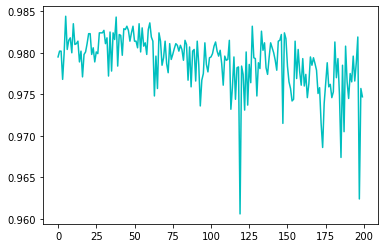

In [ ]:
plt.plot(list(range(200)),acc_d,'c')

In [ ]:
acc_c=acc_list_model(model_c,200)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

In [ ]:
#plt.plot(list(range(200)),acc_c,'b')

In [ ]:
acc_b=acc_list_model(model_b,200)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

In [ ]:
#plt.plot(list(range(200)),acc_b,'g')

In [ ]:
acc_a=acc_list_model(model_a,200)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

In [ ]:
#plt.plot(list(range(200)),acc_a,'r')

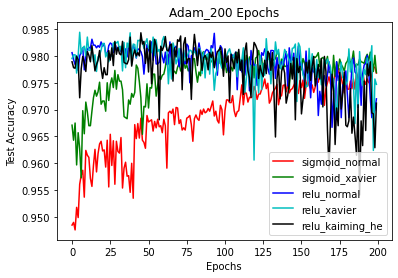

In [ ]:
plt.plot(list(range(200)),acc_a,'r')
plt.plot(list(range(200)),acc_b,'g')
plt.plot(list(range(200)),acc_c,'b')
plt.plot(list(range(200)),acc_d,'c')
plt.plot(list(range(200)),acc_e,'k')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Adam_200 Epochs')
l=['sigmoid_normal','sigmoid_xavier','relu_normal','relu_xavier','relu_kaiming_he']
plt.legend(l)
plt.show()

In [ ]:
acc_a=acc_list_model(model_a,20)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done


In [ ]:
#plt.plot(list(range(20)),acc_a,'r')

In [ ]:
acc_b=acc_list_model(model_b,20)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done


In [ ]:
#plt.plot(list(range(20)),acc_b,'r')

In [ ]:
acc_c=acc_list_model(model_c,20)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done


In [ ]:
acc_d=acc_list_model(model_d,20)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done


In [ ]:
acc_e=acc_list_model(model_e,20)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done


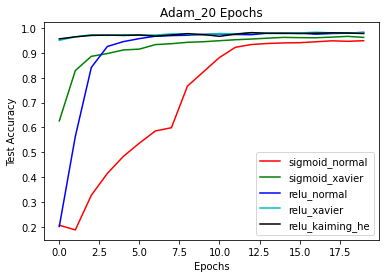

In [ ]:
plt.plot(list(range(20)),acc_a,'r')
plt.plot(list(range(20)),acc_b,'g')
plt.plot(list(range(20)),acc_c,'b')
plt.plot(list(range(20)),acc_d,'c')
plt.plot(list(range(20)),acc_e,'k')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Adam_20 Epochs')
l=['sigmoid_normal','sigmoid_xavier','relu_normal','relu_xavier','relu_kaiming_he']
plt.legend(l)
plt.show()

In [ ]:
def acc_list_model_sgd(model,epochs):
  lis=[]
  for epoch_no in range(epochs):
    train_model_sgd(model,epoch_no)
    ac=test_model_sgd(model)
    lis.append(ac)
    print("epoch number {} done".format(epoch_no))
    
  return lis

In [ ]:
acc_a_sgd=acc_list_model_sgd(model_a,50)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

In [ ]:
#acc_a_sgd=acc_list_model_sgd(model_a,50)

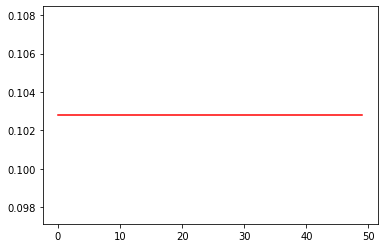

In [ ]:
plt.plot(list(range(50)),acc_a_sgd,'r')

In [ ]:
acc_b_sgd=acc_list_model_sgd(model_b,50)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

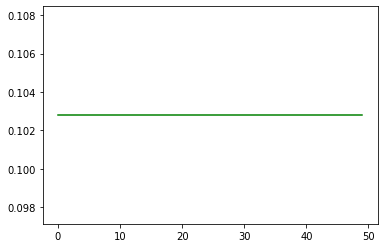

In [ ]:
plt.plot(list(range(50)),acc_b_sgd,'g')

In [ ]:
acc_e_sgd=acc_list_model_sgd(model_e,50)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

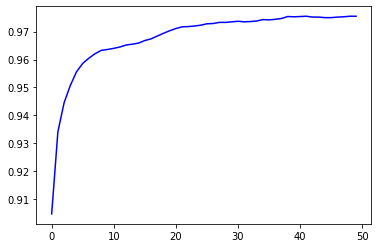

In [ ]:
plt.plot(list(range(50)),acc_e_sgd,'b')

In [ ]:
acc_d_sgd=acc_list_model_sgd(model_d,50)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

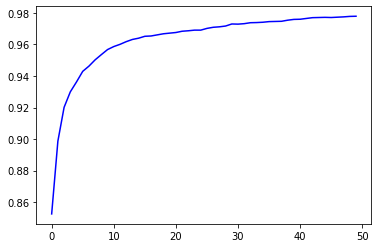

In [ ]:
plt.plot(list(range(50)),acc_d_sgd,'b')

In [ ]:
acc_c_sgd=acc_list_model_sgd(model_c,50)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

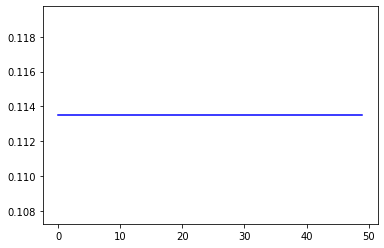

In [ ]:
plt.plot(list(range(50)),acc_c_sgd,'b')

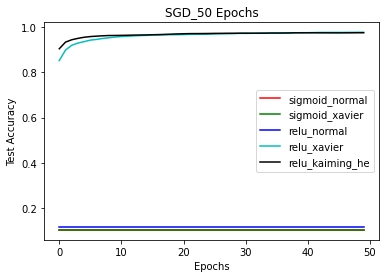

In [ ]:
plt.plot(list(range(50)),acc_a_sgd,'r')
plt.plot(list(range(50)),acc_b_sgd,'g')
plt.plot(list(range(50)),acc_c_sgd,'b')
plt.plot(list(range(50)),acc_d_sgd,'c')
plt.plot(list(range(50)),acc_e_sgd,'k')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SGD_50 Epochs')
l=['sigmoid_normal','sigmoid_xavier','relu_normal','relu_xavier','relu_kaiming_he']
plt.legend(l)
plt.show()

In [ ]:
acc_a_sgd_200=acc_list_model_sgd(model_a,200)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

In [ ]:
acc_b_sgd_200=acc_list_model_sgd(model_b,200)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

In [ ]:
acc_c_sgd_200=acc_list_model_sgd(model_c,200)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

In [ ]:
acc_d_sgd_200=acc_list_model_sgd(model_d,200)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

In [ ]:
acc_e_sgd_200=acc_list_model_sgd(model_e,200)

epoch number 0 done
epoch number 1 done
epoch number 2 done
epoch number 3 done
epoch number 4 done
epoch number 5 done
epoch number 6 done
epoch number 7 done
epoch number 8 done
epoch number 9 done
epoch number 10 done
epoch number 11 done
epoch number 12 done
epoch number 13 done
epoch number 14 done
epoch number 15 done
epoch number 16 done
epoch number 17 done
epoch number 18 done
epoch number 19 done
epoch number 20 done
epoch number 21 done
epoch number 22 done
epoch number 23 done
epoch number 24 done
epoch number 25 done
epoch number 26 done
epoch number 27 done
epoch number 28 done
epoch number 29 done
epoch number 30 done
epoch number 31 done
epoch number 32 done
epoch number 33 done
epoch number 34 done
epoch number 35 done
epoch number 36 done
epoch number 37 done
epoch number 38 done
epoch number 39 done
epoch number 40 done
epoch number 41 done
epoch number 42 done
epoch number 43 done
epoch number 44 done
epoch number 45 done
epoch number 46 done
epoch number 47 done
ep

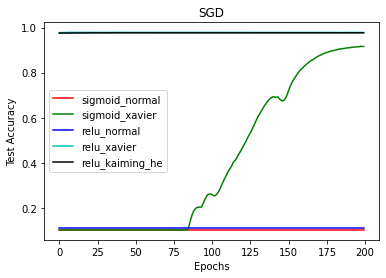

In [ ]:
plt.plot(list(range(200)),acc_a_sgd_200,'r')
plt.plot(list(range(200)),acc_b_sgd_200,'g')
plt.plot(list(range(200)),acc_c_sgd_200,'b')
plt.plot(list(range(200)),acc_d_sgd_200,'c')
plt.plot(list(range(200)),acc_e_sgd_200,'k')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SGD')
l=['sigmoid_normal','sigmoid_xavier','relu_normal','relu_xavier','relu_kaiming_he']
plt.legend(l)
plt.show()

*The graphs changed everytime the code was ran, even for the same set of parameters, I have attached a snapshot of the graph I had obtained(different to the above ones) for a batch size of 128 and a learning rate of 0.01.*

[Click Here for the Image](https://drive.google.com/uc?id=1DSiWYDhnIq7PYwGzzfnBEnmTR-cneSaz)

In [ ]:
#### Part 4

In [101]:
class Neural_Network_4A(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    self.fifth_la=0
    super(Neural_Network_4A,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)

    nn.init.xavier_normal_(self.inp.weight)

    self.l1=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l1.weight)

    self.l2=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l2.weight)

    self.l3=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l3.weight)

    self.l4=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l4.weight)

    self.l5=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l5.weight)

    self.ou=nn.Linear(hidden_units,out)

    nn.init.xavier_normal_(self.ou.weight)

    self.lsigmoid=nn.Sigmoid()
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.lsigmoid(self.inp(self.x))
    self.x1=self.lsigmoid(self.l1(self.xi))
    self.x2=self.lsigmoid(self.l2(self.x1))
    self.x3=self.lsigmoid(self.l3(self.x2))
    self.x4=self.lsigmoid(self.l4(self.x3))
    self.x5=self.lsigmoid(self.l5(self.x4))
    self.x6=self.ou(self.x5)
    self.softmax=F.log_softmax(self.x6,dim=1) 
    return self.softmax

In [102]:
class Neural_Network_4B(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    self.fifth_la=0
    super(Neural_Network_4B,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)

    nn.init.xavier_normal_(self.inp.weight)

    self.l1=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l1.weight)

    self.l2=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l2.weight)

    self.l3=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l3.weight)

    self.l4=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l4.weight)

    self.l5=nn.Linear(hidden_units,hidden_units)

    nn.init.xavier_normal_(self.l5.weight)

    self.ou=nn.Linear(hidden_units,out)

    nn.init.xavier_normal_(self.ou.weight)

    self.lsigmoid=nn.Sigmoid()

    self.dropout1=nn.Dropout(0.2)
    self.dropout2=nn.Dropout(0.5)
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.dropout1(self.lsigmoid(self.inp(self.x)))
    self.x1=self.dropout2(self.lsigmoid(self.l1(self.xi)))
    self.x2=self.dropout2(self.lsigmoid(self.l2(self.x1)))
    self.x3=self.dropout2(self.lsigmoid(self.l3(self.x2)))
    self.x4=self.dropout2(self.lsigmoid(self.l4(self.x3)))
    self.x5=self.dropout2(self.lsigmoid(self.l5(self.x4)))
    self.x6=self.ou(self.x5)
    self.softmax=F.log_softmax(self.x6,dim=1) 
    return self.softmax

In [103]:
class Neural_Network_4C(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    self.fifth_la=0
    super(Neural_Network_4C,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)

    nn.init.kaiming_normal_(self.inp.weight)

    self.l1=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l1.weight)

    self.l2=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l2.weight)

    self.l3=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l3.weight)

    self.l4=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l4.weight)

    self.l5=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l5.weight)

    self.ou=nn.Linear(hidden_units,out)

    nn.init.kaiming_normal_(self.ou.weight)

    self.relu=nn.ReLU()
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.relu(self.inp(self.x))
    self.x1=self.relu(self.l1(self.xi))
    self.x2=self.relu(self.l2(self.x1))
    self.x3=self.relu(self.l3(self.x2))
    self.x4=self.relu(self.l4(self.x3))
    self.x5=self.relu(self.l5(self.x4))
    self.x6=self.ou(self.x5)
    self.softmax=F.log_softmax(self.x6,dim=1) 
    return self.softmax

In [104]:
class Neural_Network_4D(nn.Module):
  def __init__(self,input_units,hidden_units,out):
    self.input_units=input_units
    self.fifth_la=0
    super(Neural_Network_4D,self).__init__()
    self.inp=nn.Linear(input_units,hidden_units)

    nn.init.kaiming_normal_(self.inp.weight)

    self.l1=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l1.weight)

    self.l2=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l2.weight)

    self.l3=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l3.weight)

    self.l4=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l4.weight)

    self.l5=nn.Linear(hidden_units,hidden_units)

    nn.init.kaiming_normal_(self.l5.weight)

    self.ou=nn.Linear(hidden_units,out)

    nn.init.kaiming_normal_(self.ou.weight)

    self.relu=nn.ReLU()

    self.dropout1=nn.Dropout(0.2)
    self.dropout2=nn.Dropout(0.5)
  
  def Forward_prop(self,x):
    x=x.view(-1,self.input_units)
    self.x=x
    self.xi=self.dropout1(self.relu(self.inp(self.x)))
    self.x1=self.dropout2(self.relu(self.l1(self.xi)))
    self.x2=self.dropout2(self.relu(self.l2(self.x1)))
    self.x3=self.dropout2(self.relu(self.l3(self.x2)))
    self.x4=self.dropout2(self.relu(self.l4(self.x3)))
    self.x5=self.dropout2(self.relu(self.l5(self.x4)))
    self.x6=self.ou(self.x5)
    self.softmax=F.log_softmax(self.x6,dim=1) 
    return self.softmax

In [69]:
trainc=torch.utils.data.DataLoader(mnist_train,batch_size=512)
testc=torch.utils.data.DataLoader(mnist_test,batch_size=512)

In [105]:
train=torch.utils.data.DataLoader(mnist_train,batch_size=1024)
test=torch.utils.data.DataLoader(mnist_test,batch_size=1024)

In [106]:
def train_model_4(model,no_of_epochs):
  l=[]
  loss_val=0
  j=0
  loss=nn.CrossEntropyLoss()
  param=model.parameters()
  optimize=torch.optim.Adam(param,lr=0.001)
  for num,dat in enumerate(train):
    j+=1
    im,la=dat
    ff_out=model.Forward_prop(im.cuda())
    optimize.zero_grad()
    losses=loss(ff_out,la.cuda())
    losses.backward()
    loss_val+=losses.item() * im.size(0)
    optimize.step()
  print("epoch {} is done".format(no_of_epochs))
  return loss_val/len(train.dataset)
    #_,pred=torch.max(test_out.data,1)
  #print("epoch {} is done".format(i))

In [70]:
def train_model_4c(model,no_of_epochs):
  l=[]
  loss_val=0
  j=0
  loss=nn.CrossEntropyLoss()
  param=model.parameters()
  optimize=torch.optim.Adam(param,lr=0.001)
  for num,dat in enumerate(trainc):
    j+=1
    im,la=dat
    ff_out=model.Forward_prop(im.cuda())
    optimize.zero_grad()
    losses=loss(ff_out,la.cuda())
    losses.backward()
    loss_val+=losses.item() * im.size(0)
    optimize.step()
  print("epoch {} is done".format(no_of_epochs))
  return loss_val/len(trainc.dataset)
    #_,pred=torch.max(test_out.data,1)
  #print("epoch {} is done".format(i))

In [107]:
def test_model_4(model):
  model.eval()
  length=0
  acc=[]
  correct_count=0
  loss=nn.CrossEntropyLoss()
  with torch.no_grad():

    for dat in test:
      r_l=0
      im,la=dat
      test_out=model.Forward_prop(im.cuda())
      l=loss(test_out.cpu(),la.cpu())
      r_l+=l.item()
      _,pred=torch.max(test_out.data,1)
      length+=la.size(0)
      #correct_count+=(pred.cpu()==la).sum().item()
  return(r_l)

In [71]:
def test_model_4c(model):
  model.eval()
  length=0
  acc=[]
  correct_count=0
  loss=nn.CrossEntropyLoss()
  with torch.no_grad():

    for dat in testc:
      r_l=0
      im,la=dat
      test_out=model.Forward_prop(im.cuda())
      l=loss(test_out.cpu(),la.cpu())
      r_l+=l.item()
      _,pred=torch.max(test_out.data,1)
      length+=la.size(0)
      #correct_count+=(pred.cpu()==la).sum().item()
  return(r_l)

In [ ]:
train=torch.utils.data.DataLoader(mnist_train,batch_size=1024)
test=torch.utils.data.DataLoader(mnist_test,batch_size=1024)

In [108]:
model_4A=Neural_Network_4A(input_units=28*28,hidden_units=1024,out=10).cuda()
model_4B=Neural_Network_4B(input_units=28*28,hidden_units=1024,out=10).cuda()
model_4C=Neural_Network_4C(input_units=28*28,hidden_units=1024,out=10).cuda()
model_4D=Neural_Network_4D(input_units=28*28,hidden_units=1024,out=10).cuda()

In [109]:
def loss_calculation(model,no_of_epochs):
  loss_e_te=[]
  loss_e_tr=[]
  for i in range(no_of_epochs):
    tr=train_model_4(model,i)
    te=test_model_4(model)
    loss_e_te.append(te)
    loss_e_tr.append(tr)
  return loss_e_tr,loss_e_te

In [ ]:
loss_tr_a,loss_te_a=loss_calculation(model_4A,500)

epoch 0 is done
epoch 1 is done
epoch 2 is done
epoch 3 is done
epoch 4 is done
epoch 5 is done
epoch 6 is done
epoch 7 is done
epoch 8 is done
epoch 9 is done
epoch 10 is done
epoch 11 is done
epoch 12 is done
epoch 13 is done
epoch 14 is done
epoch 15 is done
epoch 16 is done
epoch 17 is done
epoch 18 is done
epoch 19 is done
epoch 20 is done
epoch 21 is done
epoch 22 is done
epoch 23 is done
epoch 24 is done
epoch 25 is done
epoch 26 is done
epoch 27 is done
epoch 28 is done
epoch 29 is done
epoch 30 is done
epoch 31 is done
epoch 32 is done
epoch 33 is done
epoch 34 is done
epoch 35 is done
epoch 36 is done
epoch 37 is done
epoch 38 is done
epoch 39 is done
epoch 40 is done
epoch 41 is done
epoch 42 is done
epoch 43 is done
epoch 44 is done
epoch 45 is done
epoch 46 is done
epoch 47 is done
epoch 48 is done
epoch 49 is done
epoch 50 is done
epoch 51 is done
epoch 52 is done
epoch 53 is done
epoch 54 is done
epoch 55 is done
epoch 56 is done
epoch 57 is done
epoch 58 is done
epoch 5

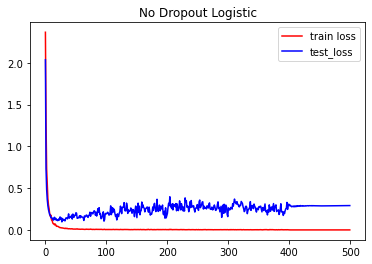

In [ ]:
plt.plot(list(range(500)),loss_tr_a,'r')
plt.plot(list(range(500)),loss_te_a,'b')
plt.title('No Dropout Logistic')
l=['train loss','test_loss']
plt.legend(l)


In [ ]:
loss_tr_b,loss_te_b=loss_calculation(model_4B,500)

epoch 0 is done
epoch 1 is done
epoch 2 is done
epoch 3 is done
epoch 4 is done
epoch 5 is done
epoch 6 is done
epoch 7 is done
epoch 8 is done
epoch 9 is done
epoch 10 is done
epoch 11 is done
epoch 12 is done
epoch 13 is done
epoch 14 is done
epoch 15 is done
epoch 16 is done
epoch 17 is done
epoch 18 is done
epoch 19 is done
epoch 20 is done
epoch 21 is done
epoch 22 is done
epoch 23 is done
epoch 24 is done
epoch 25 is done
epoch 26 is done
epoch 27 is done
epoch 28 is done
epoch 29 is done
epoch 30 is done
epoch 31 is done
epoch 32 is done
epoch 33 is done
epoch 34 is done
epoch 35 is done
epoch 36 is done
epoch 37 is done
epoch 38 is done
epoch 39 is done
epoch 40 is done
epoch 41 is done
epoch 42 is done
epoch 43 is done
epoch 44 is done
epoch 45 is done
epoch 46 is done
epoch 47 is done
epoch 48 is done
epoch 49 is done
epoch 50 is done
epoch 51 is done
epoch 52 is done
epoch 53 is done
epoch 54 is done
epoch 55 is done
epoch 56 is done
epoch 57 is done
epoch 58 is done
epoch 5

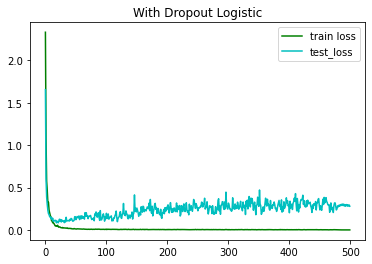

In [ ]:
plt.plot(list(range(500)),loss_tr_b,'g')
plt.plot(list(range(500)),loss_te_b,'c')
plt.title('With Dropout Logistic')
l=['train loss','test_loss']
plt.legend(l)


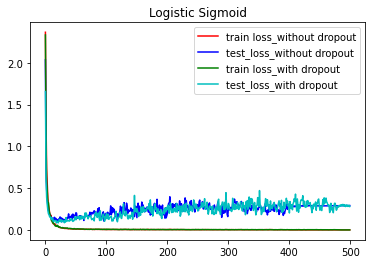

In [ ]:
plt.plot(list(range(500)),loss_tr_a,'r')
plt.plot(list(range(500)),loss_te_a,'b')
plt.plot(list(range(500)),loss_tr_b,'g')
plt.plot(list(range(500)),loss_te_b,'c')
plt.title('Logistic Sigmoid')
l=['train loss_without dropout','test_loss_without dropout','train loss_with dropout','test_loss_with dropout']
plt.legend(l)
plt.show()

In [91]:
loss_tr_d,loss_te_d=loss_calculation(model_4D,50)

epoch 0 is done
epoch 1 is done
epoch 2 is done
epoch 3 is done
epoch 4 is done
epoch 5 is done
epoch 6 is done
epoch 7 is done
epoch 8 is done
epoch 9 is done
epoch 10 is done
epoch 11 is done
epoch 12 is done
epoch 13 is done
epoch 14 is done
epoch 15 is done
epoch 16 is done
epoch 17 is done
epoch 18 is done
epoch 19 is done
epoch 20 is done
epoch 21 is done
epoch 22 is done
epoch 23 is done
epoch 24 is done
epoch 25 is done
epoch 26 is done
epoch 27 is done
epoch 28 is done
epoch 29 is done
epoch 30 is done
epoch 31 is done
epoch 32 is done
epoch 33 is done
epoch 34 is done
epoch 35 is done
epoch 36 is done
epoch 37 is done
epoch 38 is done
epoch 39 is done
epoch 40 is done
epoch 41 is done
epoch 42 is done
epoch 43 is done
epoch 44 is done
epoch 45 is done
epoch 46 is done
epoch 47 is done
epoch 48 is done
epoch 49 is done


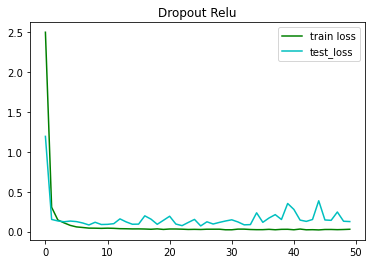

In [93]:
plt.plot(list(range(50)),loss_tr_d,'g')
plt.plot(list(range(50)),loss_te_d,'c')
plt.title('Dropout Relu')
l=['train loss','test_loss']
plt.legend(l)

In [95]:
loss_tr_c,loss_te_c=loss_calculation(model_4C,50)

epoch 0 is done
epoch 1 is done
epoch 2 is done
epoch 3 is done
epoch 4 is done
epoch 5 is done
epoch 6 is done
epoch 7 is done
epoch 8 is done
epoch 9 is done
epoch 10 is done
epoch 11 is done
epoch 12 is done
epoch 13 is done
epoch 14 is done
epoch 15 is done
epoch 16 is done
epoch 17 is done
epoch 18 is done
epoch 19 is done
epoch 20 is done
epoch 21 is done
epoch 22 is done
epoch 23 is done
epoch 24 is done
epoch 25 is done
epoch 26 is done
epoch 27 is done
epoch 28 is done
epoch 29 is done
epoch 30 is done
epoch 31 is done
epoch 32 is done
epoch 33 is done
epoch 34 is done
epoch 35 is done
epoch 36 is done
epoch 37 is done
epoch 38 is done
epoch 39 is done
epoch 40 is done
epoch 41 is done
epoch 42 is done
epoch 43 is done
epoch 44 is done
epoch 45 is done
epoch 46 is done
epoch 47 is done
epoch 48 is done
epoch 49 is done


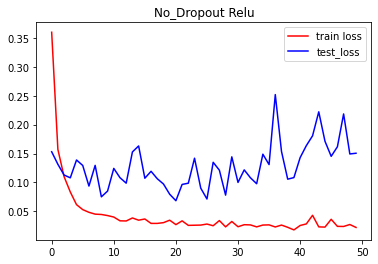

In [96]:
plt.plot(list(range(50)),loss_tr_c,'r')
plt.plot(list(range(50)),loss_te_c,'b')
plt.title('No_Dropout Relu')
l=['train loss','test_loss']
plt.legend(l)

*As we see the trends in the graphs the test loss(without dropout) increases after a point possibly because of overfitting of the data. With dropout we see the test loss is lesser.*